# Schelling's model of segregation

Described [here](https://en.wikipedia.org/wiki/Schelling%27s_model_of_segregation).

Implementation method [here](http://nifty.stanford.edu/2014/mccown-schelling-model-segregation/).

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random as rd

INITIAL VALUES FOR VARIABLES

In [43]:
N  = 10

density = 0.5  #starting percentage
f1      = 0.4  #fraction of '1' in starting population
f_1     = 1-f1 #fraction of '-1' in starting population

t  =  0.5      #percentage of neighbourhood that must be like the agent

# define color map 
color_map = {-1: np.array([255, 0, 0]), # red
             0: np.array([255, 255, 255]), # green
             1: np.array([0, 0, 255])} # blue 

In [17]:
#initialize matrix
matrix = list()

for i in range(N):
    linha = list()
    for j in range(N):
        linha.append(0)
    matrix.append(linha)       

In [18]:
#fill matrix
for linha in range(len(matrix)):
    for coluna in range(len(matrix[linha])):
        if (rd.random() <= density):
            if (rd.random() <= f1):
                matrix[linha][coluna] = 1
            else:
                matrix[linha][coluna] = -1

Code to manipulate color from [here](https://stackoverflow.com/questions/37719304/python-imshow-set-certain-value-to-defined-color).

In [19]:
def print_matrix(matrix):
    # make a 3d numpy array that has a color channel dimension   
    data_3d = np.ndarray(shape=(N, N, 3), dtype=int)
    for i in range(0, N):
        for j in range(0, N):
            data_3d[i][j] = color_map[matrix[i][j]]

    plt.imshow(data_3d)

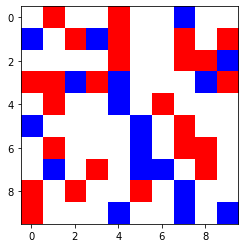

In [20]:
print_matrix(matrix)

In [21]:
# returns list of [x,y] coordinates of the neighbours of a certain point w/ coordinates 'coordinates'
# N being the dimension of the matrix (NxN)
def get_neighbours(coordinates, N):
    neighbours = list()
    n_range    = [-1, 0, 1]
    [x, y]     = coordinates
    
    for i in n_range:
        for j in n_range:
            if ((x+i >= 0 and x+i < N) and (y+j >= 0 and y+j < N)) and (not (i == 0 and j == 0)):
                neighbours.append([x+i, y+j])
                  
    return neighbours

# returns list of coordinates of empty spaces in the matrix
def get_empty_space(matrix):
    empty_coords = list()
    
    for linha in range(len(matrix)):
        for coluna in range(len(matrix)):
            if matrix[linha][coluna] == 0:
                empty_coords.append([linha, coluna])
                
    return empty_coords
                
# returns list of 'races' of the neighbours of a certain point w/ coordinates 'coordinates'           
def check_neighbours(coordinates, matrix):
    N = len(matrix)
    neighbours = get_neighbours(coordinates,N)
    content = list()
    
    content = [matrix[pos[0]][pos[1]] for pos in neighbours]
    
    return content

In [22]:
print(get_neighbours([1,1], N))
print(check_neighbours([1, 1], matrix))
print(len(get_empty_space(matrix)))

[[0, 0], [0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 2]]
[0, -1, 0, 1, -1, 0, 0, 0]
57


We now need to find the dissatisfied agents

In [23]:
#algo return 1 if agent gathers conditions that satisfy dissatisfaction and 0 if it doesn't

# algo(coordinates, matrix)
def get_dissatisfied(matrix, algo):
    dissatisfied = list()
    for linha in range(len(matrix)):
        for coluna in range(len(matrix)):
            if algo([linha, coluna], matrix):
                dissatisfied.append([linha, coluna])
    return dissatisfied

Simple algorithm that checks if theres a minimum percentage of t neighbours around

In [32]:
# returns 1 if not satisfied (must be moved) and 0 if it is satisfied (will stay still)
def is_not_satisfied(coord, matrix):
    agent_val = matrix[coord[0]][coord[1]]
    n_agents  = check_neighbours(coord, matrix)
    
    n_1 = 0
    n0  = 0
    n1  = 0
    
    for agent in n_agents:
        if agent == -1:
            n_1 += 1
        if agent == 0:
            n0  += 1
        if agent == 1:
            n1  += 1
            
    if (n_1 + n1) == 0:
        return 0
            
    val_sum = {-1:n_1, 0:n0, 1:n1}
       
    if val_sum[agent_val]/(n_1 + n1) < t:
        return 1
    return 0

In [25]:
# returns the new position of a dissatisfied agent; 
# several methods can be used; right now a random empty location is used
def get_new_position(matrix):
    empty_spaces = get_empty_space(matrix)
    new_pos = rd.choice(empty_spaces)
    return new_pos

In [26]:
# returns list with:
# 0: new matrix with all agents moved
# 1: boolean that is True if agents were moved, false if matrix stayed the same
def move_all_agents(c_matrix): # c_matrix = current matrix
     # current matrix
    new_matrix = c_matrix
    were_moved = False
    
    # iterate on all the agents of the current matrix
    for x in range(len(c_matrix)): # linhas
        for y in range(len(c_matrix[x])): # colunas
            
            # check if agent not satisfied
            if is_not_satisfied([x,y],c_matrix) == 1:
                were_moved = True
                # not satified: will be moved
                new_pos = get_new_position(c_matrix)
                new_matrix[new_pos[0]][new_pos[1]] = c_matrix[x][y] # new position takes agent's value
                new_matrix[x][y] = 0 # old position is now free
            
            
    # create output
    outcome = list()
    outcome.append(new_matrix)
    outcome.append(were_moved)
    
    return outcome

In [34]:
def run_simulation(matrix, n_max): # matrix - initial matrix // n_max - max number of iterations
    iterations = list() # list of matrices (for all iterations)
    iterations.append(matrix) # initial value is the initial matrix
    
    i = 0 # number of iterations
    
    for j in range(n_max):
        c_matrix = iterations[-1]
        outcome = move_all_agents(c_matrix)
        if (outcome[1] == True):
            i += 1
            iterations.append(outcome[0])
        else:
            break
    
    print("Simulation finished! i = ", i)
    
    return iterations

In [28]:
#generates 100 vals between 0 and 3

vals = [round(rd.uniform(-0.5, 3.5), 0) for i in range(100)]

In [41]:
iterations = run_simulation(matrix, 100)

Simulation finished! i =  1000
